In [1]:

###import Packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [151]:

#Importing data set
train=pd.read_csv("C:/Users/akshay.arora/Desktop/akshay12/bank_additional/bank_additional/bank_additional_full.csv")

In [191]:
#Counting the number of of levels of an output variable.
train['Target'].value_counts()


0    36548
1     4640
Name: Target, dtype: int64

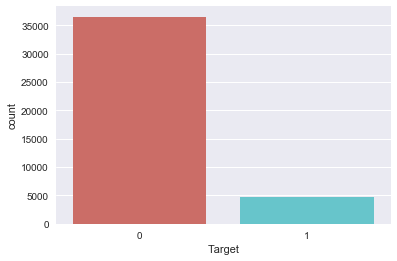

In [193]:
sns.countplot(x='Target',data=train,palette='hls')

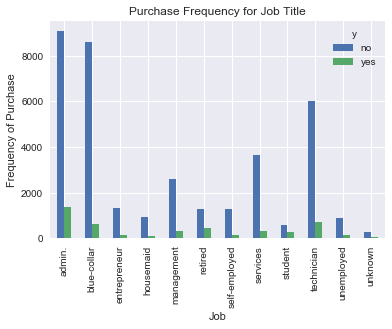

In [199]:

#Frequency of purchase based on Job Profile
#%matplotlib inline
pd.crosstab(train.job,train.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

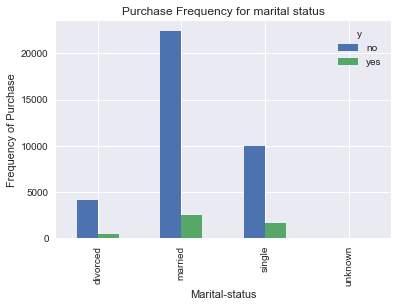

In [201]:
#Frequency of purchase based on Marital-Status
pd.crosstab(train.marital,train.y).plot(kind='bar')
plt.title('Purchase Frequency for marital status')
plt.xlabel('Marital-status')
plt.ylabel('Frequency of Purchase')
plt.savefig('Marital Status')

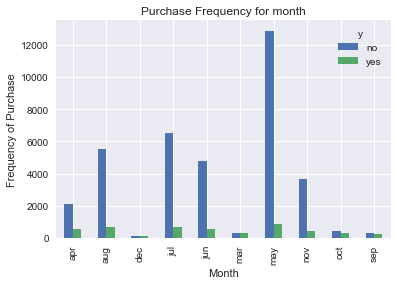

In [203]:
#Frequency of purchase based on Month
pd.crosstab(train.month,train.y).plot(kind='bar')
plt.title('Purchase Frequency for month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('month')

In [152]:
#Counting the number of numerical columns and seperating the categorical variables.
num_cols = train._get_numeric_data().columns
cat_cols=['poutcome',
 'housing',
 'default',
 'month',
 'contact',
 'day_of_week',
 'loan',
 'job',
 'marital',
 ]
target=train['Target']

In [153]:
#Taking Numerical Variables
train_numerical=train[['age', 'duration', 'campaign', 'pdays', 'previous', 
                       'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [154]:
#Creating the dummt variables for categorical variables
for var in cat_cols:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train_numerical1=train_numerical.join(cat_list)
    train_numerical=train_numerical1

In [155]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(train_numerical,target, test_size=0.3, random_state=0)

In [156]:
#FEATURE or variable selection using RFE.
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)
print(X_train.columns)

[False False False False  True False False False  True False  True  True
  True False False False False  True False  True False  True False False
  True  True  True  True False False False False False  True  True  True
 False False False False  True False False False  True False False  True
 False False False False False False False]
[33 32 34 36  1 18 23 20  1 25  1  1  1 14  5 35 10  1 38  1  3  1  9 15
  1  1  1  1 16 17  4 22  6  1  1  1 19 12 13 29  1 26 27  7  1 11  2  1
 30 21 31  8 28 24 37]
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'housing_no', 'housing_unknown', 'housing_yes', 'default_no',
       'default_unknown', 'default_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'contact_cellular', 'cont

In [173]:

X_train_final=X_train[["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]]




In [174]:

X_test_final=X_test[["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]]


In [175]:
#Logistic Regression Classifier

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:

#accuracy score using logistic regression
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test_final))))

Logistic regression accuracy: 0.897


In [182]:
#Accuracy score using Random forest
random = RandomForestClassifier()
random.fit(X_train_final, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
print('random forest accuracy: {:.3f}'.format(accuracy_score(y_test, random.predict(X_test_final))))

random forest accuracy: 0.892


In [185]:
#Using K fold technique for Randomforest 
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,train_numerical, target, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.895


In [186]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_final, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)